In [2]:
pip install ucimlrepo

In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Lambda
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.utils import to_categorical

In [33]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dow_jones_index = fetch_ucirepo(id=312)

# data (as pandas dataframes)
X = dow_jones_index.data.features
y = dow_jones_index.data.targets

# metadata
print(dow_jones_index.metadata)

# variable information
print(dow_jones_index.variables)


{'uci_id': 312, 'name': 'Dow Jones Index', 'repository_url': 'https://archive.ics.uci.edu/dataset/312/dow+jones+index', 'data_url': 'https://archive.ics.uci.edu/static/public/312/data.csv', 'abstract': 'This dataset contains weekly data for the Dow Jones Industrial Index.  It has been used in computational investing research.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Time-Series'], 'num_instances': 750, 'num_features': 15, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['percent_change_next_weeks_price'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5788V', 'creators': ['Michael Brown'], 'intro_paper': {'ID': 415, 'type': 'NATIVE', 'title': 'Dynamic-Radius Species-Conserving Genetic Algorithm for the Financial Forecasting of Dow Jones Index Stocks', 'authors': 'M. S. Brown, M. Pelosi, Henry D

In [34]:
# prompt: Juntos os dois arquivo em um df

import pandas as pd

# Assuming you have X and y defined from the previous code snippet
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Now you have a DataFrame 'df' containing both features and targets
print(df.head())  # Display the first few rows of the DataFrame

   quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19           $15

In [35]:
# prompt: Using dataframe df: Agora Drop as colunas stock, quarter,

# Assuming your dataframe is named 'df'

# Drop the 'stock' and 'quarter' columns if they exist
if 'stock' in df.columns:
  df = df.drop('stock', axis=1)

if 'quarter' in df.columns:
  df = df.drop('quarter', axis=1)

In [36]:
# prompt: Agora verifiquei os campos nulos

# Check for null values in the DataFrame
null_counts = df.isnull().sum()

# Print the number of null values for each column
print(null_counts)

# You can also get a boolean mask for the entire DataFrame
# to see where null values are present
null_values = df.isnull()
null_values


# If you want to drop rows with any null values, use
# df.dropna(axis=0, inplace=True)

# If you want to fill null values with a specific value,
# like the mean of the column, use:
# df.fillna(df.mean(), inplace=True)

date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
days_to_next_dividend                  0
percent_return_next_dividend           0
percent_change_next_weeks_price        0
dtype: int64


,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
0,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,False,False,False,False,False,False,False,False,False,False,False,False,False,False
746,False,False,False,False,False,False,False,False,False,False,False,False,False,False
747,False,False,False,False,False,False,False,False,False,False,False,False,False,False
748,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
# prompt: Using dataframe y: Gere o codigo para verificar dados ausentes transformar em zeros

# Fill missing values with 0
df['percent_change_volume_over_last_wk'] = df['percent_change_volume_over_last_wk'].fillna(0)
df['previous_weeks_volume'] = df['previous_weeks_volume'].fillna(0)


In [38]:
# prompt: Excluir valores zerados do dataset

# Remove rows where any column has a value of 0
df = df[~(df == 0).any(axis=1)]

In [39]:
# prompt: Verifique todos os dados ausentes do dataset X

# Check for missing values in X
print(df.isnull().sum())

date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
days_to_next_dividend                 0
percent_return_next_dividend          0
percent_change_next_weeks_price       0
dtype: int64


In [40]:
df.head()

,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
1,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,19,0.187852,-2.470660
2,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,12,0.189994,1.638310
3,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5,0.185989,5.933250
4,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,97,0.175029,0.230814
5,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,90,0.172712,-0.632547


In [14]:
df.shape

(701, 14)

In [41]:
import pandas as pd
import numpy as np

In [42]:
# prompt: Substituir o $ da coluna Open para vazio

# Replace '$' with an empty string in the 'Open' column
df['open'] = df['open'].str.replace('$', '', regex=False)
df['high'] = df['high'].str.replace('$', '', regex=False)
df['low'] = df['low'].str.replace('$', '', regex=False)
df['close'] = df['close'].str.replace('$', '', regex=False)

# Print the updated DataFrame
df.head()

,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
1,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,19,0.187852,-2.470660
2,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,12,0.189994,1.638310
3,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5,0.185989,5.933250
4,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,97,0.175029,0.230814
5,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,90,0.172712,-0.632547


In [ ]:
# prompt: Tranforme do dataset em um serie temporal

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df = df.set_index('date')

# Now your DataFrame is a time series with the 'date' column as the index.
# You can access data based on dates and perform time-series analysis.

# Example: Access data for a specific year
# df['2010']

# Example: Resample the data to monthly frequency and calculate the mean
# df.resample('M').mean()

In [17]:
df.head()

,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
date,,,,,,,,,,,,,
2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,19,0.187852,-2.470660
2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,12,0.189994,1.638310
2011-01-28,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5,0.185989,5.933250
2011-02-04,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,97,0.175029,0.230814
2011-02-11,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,90,0.172712,-0.632547


In [ ]:
# Copia do campo Open para base treinamento
#base_treinamento = df.iloc[:, 1:2].values
#base_treinamento

In [18]:
# prompt: Importe o MinMaxScaler

#from sklearn.preprocessing import MinMaxScaler

# Assuming you have 'base_treinamento' defined as a NumPy array

#scaler = MinMaxScaler(feature_range=(0, 1))
#base_treinamento_scaled = scaler.fit_transform(base_treinamento)

# Now 'base_treinamento_scaled' contains the scaled values.

In [ ]:
# Normalizacao dos daodos.
#normalizador = MinMaxScaler(feature_range = (0, 1))
#base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
#base_treinamento_normalizada

In [ ]:
#X = [] # Previsores
#y = [] # Preco real

#for i in range(90, 750): # Prever 90 precos anteriores para prever o preco atual
#    X.append(base_treinamento_normalizada[i-90:i, 0])
#    y.append(base_treinamento_normalizada[i, 0])
#    #print(i, i-90)
#
#X, y = np.array(X), np.array(y)

In [19]:
#X.shape # Atributos anteriores com precos reais

(750, 15)

In [ ]:
#y.shape

(750, 1)

In [ ]:
#X[0],y[0]

In [ ]:
#X[1],y[1]

In [43]:
dow_jones_prices = pd.DataFrame(df["close"]).astype(float)
dow_jones_prices.head()

,close
1,15.97
2,15.79
3,16.13
4,17.14
5,17.37


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701 entries, 2011-01-14 to 2011-06-24
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   open                                701 non-null    object 
 1   high                                701 non-null    object 
 2   low                                 701 non-null    object 
 3   close                               701 non-null    object 
 4   volume                              701 non-null    int64  
 5   percent_change_price                701 non-null    float64
 6   percent_change_volume_over_last_wk  701 non-null    float64
 7   previous_weeks_volume               701 non-null    float64
 8   next_weeks_open                     701 non-null    object 
 9   next_weeks_close                    701 non-null    object 
 10  days_to_next_dividend               701 non-null    int64  
 11  percent_return_next_divide

Text(0, 0.5, 'Dow Jones Close')

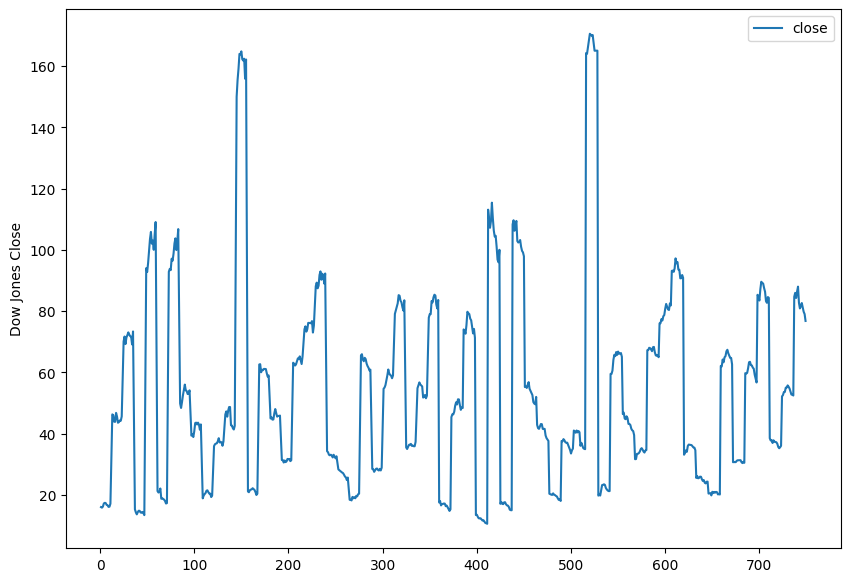

In [44]:
import matplotlib.pyplot as plt
dow_jones_prices.plot(figsize=(10, 7))
plt.ylabel("Dow Jones Close")

In [45]:
#FORMATANDO OS DADOS

# global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7

# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Create labels for windowed dataset
  E.g if horizon = 1
  Input: [0, 1,  2, 3, 4, 5, 6, 7] -> Output: ([0, 1,  2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon]

# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size label.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of window size

  # 3. Index on the target array with 2D array of multiple window sets
  windowed_array = x[window_indexes]

  #4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

# Get bitcoin date array
timesteps = dow_jones_prices.index.to_numpy()
prices = dow_jones_prices["close"].to_numpy()

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [46]:
# View the first 3 windows & labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [15.97 15.79 16.13 17.14 17.37 17.28 16.68] -> Label: 16.58
Window: [15.79 16.13 17.14 17.37 17.28 16.68 16.58] -> Label: 16.03
Window: [16.13 17.14 17.37 17.28 16.68 16.58 16.03] -> Label: 16.11


In [47]:
#FORMATANDO OS DADOS

# split the data into 80% for training and 20% for testing:
test_split=0.2
split_size = int(len(full_windows) * (1-test_split)) # this will default to 80% train, 20% test

trainX = full_windows[:split_size]
trainy = full_labels[:split_size]
testX = full_windows[split_size:]
testy = full_labels[split_size:]

In [48]:
# View the first 3 windows & labels
for i in range(3):
  print(f"Window: {trainX[i]} -> Target: {trainy[i]}")

Window: [15.97 15.79 16.13 17.14 17.37 17.28 16.68] -> Target: 16.58
Window: [15.79 16.13 17.14 17.37 17.28 16.68 16.58] -> Target: 16.03
Window: [16.13 17.14 17.37 17.28 16.68 16.58 16.03] -> Target: 16.11


In [49]:
# View the first 3 windows & labels
for i in range(3):
  print(f"Window: {testX[i]} -> Target: {testy[i]}")

Window: [78.7  80.74 82.33 80.54 80.36 82.52 81.84] -> Target: 93.13
Window: [80.74 82.33 80.54 80.36 82.52 81.84 93.13] -> Target: 93.22
Window: [82.33 80.54 80.36 82.52 81.84 93.13 93.22] -> Target: 92.82


In [64]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling2D, Dropout

# Defininf the model
verbose, epochs, batch_size = 1, 100, 8
n_outputs = 1

# Start a timer.
import time
start_time = time.time()

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=7, strides=1, padding="causal", activation='relu', input_shape=(7,1)))
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation='relu'))
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding="causal", activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding="causal", activation='relu'))


model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)                   │ (None, 7, 32)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 7, 64)               │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 7, 64)               │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 7, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 7, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           1,793 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,161 (610.00 KB)

 Trainable params: 156,161 (610.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [65]:
# fit network
h = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(testX, testy))

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 2002.2933 - val_loss: 1325.8474
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1267.8854 - val_loss: 167.7923
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 862.2393 - val_loss: 131.9777
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 390.0558 - val_loss: 460.5607
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 622.6029 - val_loss: 153.6596
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 511.4771 - val_loss: 109.8533
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 351.2536 - val_loss: 96.6823
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 305.1472 - val_loss: 92.6194
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 397.4947 - val_loss: 144.6810
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 267.3042 - val_loss: 85.1599
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 279.6277 - val_loss: 269.5063
Epoch 12/100
70/70

In [66]:
#fazendo predicao
result = model.predict(testX)
result2 =result[:,0]

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


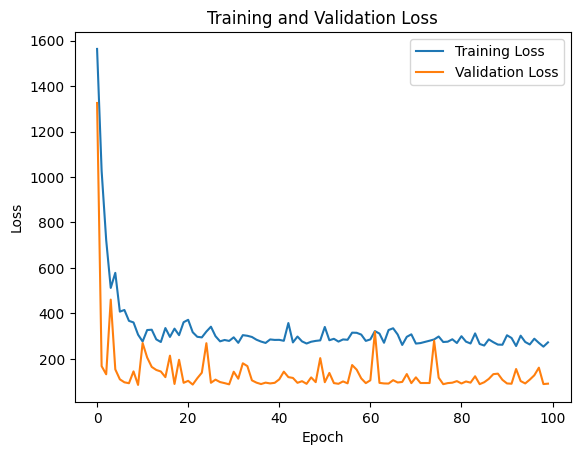

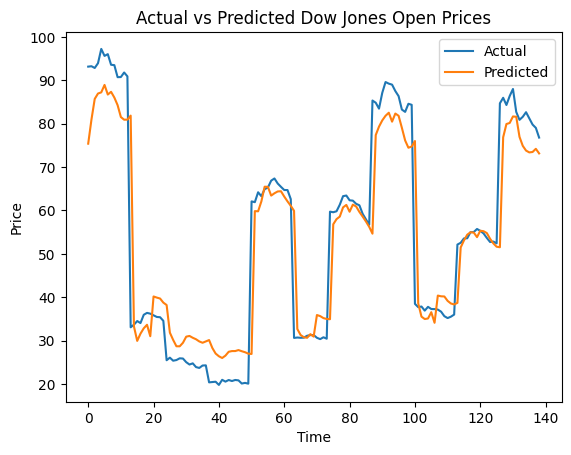

In [67]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

print(' ')

# Plot the predicted vs actual values
plt.plot(testy, label='Actual')
plt.plot(result2, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Actual vs Predicted Dow Jones Open Prices')
plt.show()

In [68]:
import numpy as np

mae = np.mean(np.abs(testy - result2))
mse = np.mean((testy - result2)**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((testy - result2) / testy)) * 100  # MAPE is in percentage
r_squared = 1 - (np.sum((testy - result2)**2) / np.sum((testy - np.mean(testy))**2))

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R-squared: {r_squared}")

MAE: 5.975774482342836
MSE: 90.67795100576096
RMSE: 9.522497099278159
MAPE: 13.921396689179275%
R-squared: 0.852809906843912


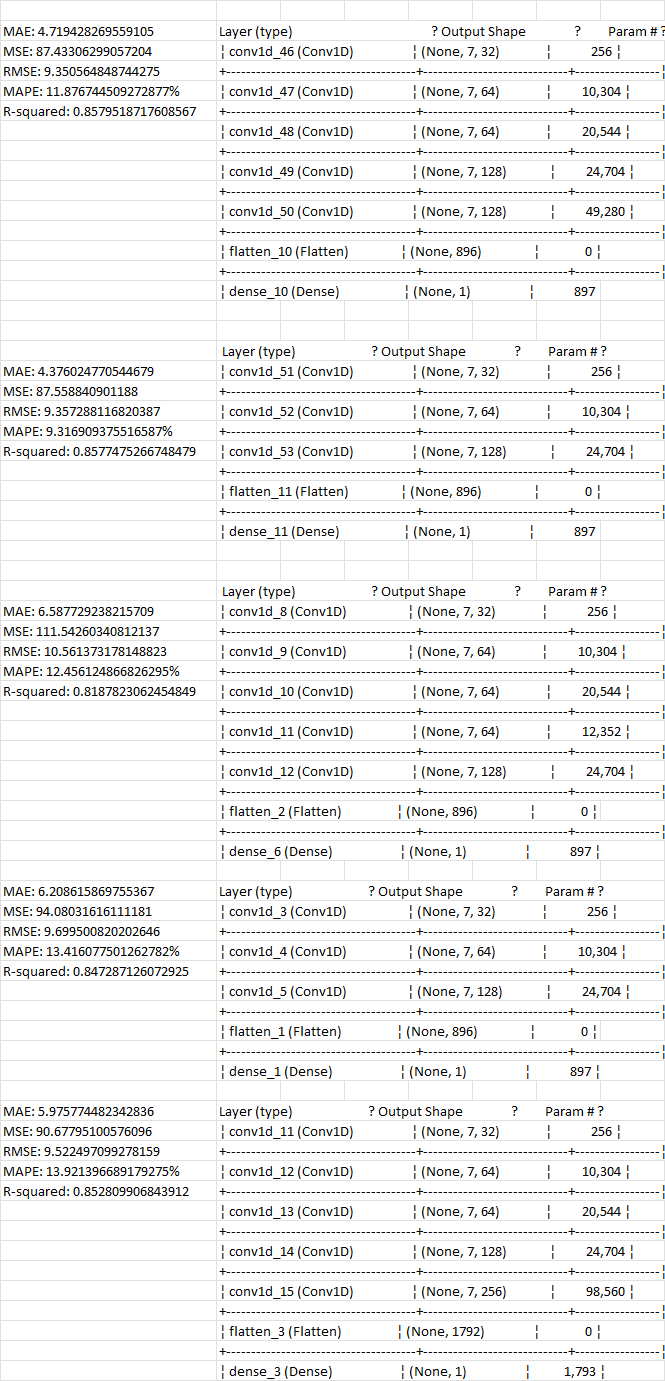

In [4]:
# Avaliação dos modelos

med_r2 = (0.8579 + 0.8577 + 0.8187 + 0.8473 + 0.8528 ) / 5
print(f"MED: {med_r2}")


MED: 0.84688


In [2]:
import numpy as np

# Dados
data = [0.8579, 0.8577, 0.8187, 0.8473, 0.8528]

# Desvio padrão amostral (divisão por n-1)
std_sample = np.std(data, ddof=1)

print("Desvio padrão amostral:", std_sample)

Desvio padrão amostral: 0.016338971815876308


In [9]:
from scipy.stats import ttest_1samp

# Dados da amostra
dados_amostra = [0.8579, 0.8577, 0.8187, 0.8473, 0.8528]

# Valor de referência (média esperada ou limite populacional)
media_referencia = 0.8

# Realizando o teste t de uma amostra
t_stat, p_value = ttest_1samp(dados_amostra, media_referencia)

# Resultados
print("Estatística t:", t_stat)
print("Valor-p:", p_value)

# Decisão
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0). A média da amostra é significativamente diferente da referência.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há evidências suficientes para diferença")


Estatística t: 6.415756631842123
Valor-p: 0.003033203667732978
Rejeitamos a hipótese nula (H0). A média da amostra é significativamente diferente da referência.
